In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avin5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avin5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\avin5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv('../data/track-b.csv')
print(f"Total number of rows: {len(df)}")
df.shape
#the dataset consists of 2768 records with 7 attributes

Total number of rows: 2768


(2768, 7)

In [4]:
df.head(10)

,id,text,anger,fear,joy,sadness,surprise
0,eng_train_track_b_00001,"Colorado, middle of nowhere.",0,1,0,0,1
1,eng_train_track_b_00002,This involved swimming a pretty large lake tha...,0,2,0,0,0
2,eng_train_track_b_00003,It was one of my most shameful experiences.,0,1,0,3,0
3,eng_train_track_b_00004,"After all, I had vegetables coming out my ears...",0,0,0,0,0
4,eng_train_track_b_00005,Then the screaming started.,0,3,0,1,2
5,eng_train_track_b_00006,"They don't fear death, and it seems they belie...",0,1,0,0,1
6,eng_train_track_b_00007,You know what happens when I get one of these ...,1,1,0,0,0
7,eng_train_track_b_00008,My stomach even started giving me fits.,0,2,0,1,0
8,eng_train_track_b_00009,"Well, as we're bowling, my dinner began to not...",0,2,0,0,0
9,eng_train_track_b_00010,Hondas are notoriously great cars for long tri...,0,0,2,0,0


In [4]:
print(df.info())
#Each record is uniquely identified by an 'id' attribute. Other attributes are the 'text' and the different emotions - 'fear','anger','joy','sadness' and 'surprise'
# The columns expressing the various emotions has values ranging from 0-3 expressing the intensity of each with respect to a particular text.
# The set of ordinal intensity classes : 0 -  for no emotion , 1 - for a low degree of emotion, 2 -  for
# a moderate degree of emotion, 3 -  for a high degree of emotion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2768 non-null   object
 1   text      2768 non-null   object
 2   anger     2768 non-null   int64 
 3   fear      2768 non-null   int64 
 4   joy       2768 non-null   int64 
 5   sadness   2768 non-null   int64 
 6   surprise  2768 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 151.5+ KB
None


In [5]:
print(df.describe())
# Fear is the most common emotion in this dataset

             anger         fear          joy      sadness     surprise
count  2768.000000  2768.000000  2768.000000  2768.000000  2768.000000
mean      0.179552     0.929552     0.347905     0.497110     0.406792
std       0.541639     0.954563     0.694333     0.836893     0.689105
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     1.000000     0.000000     0.000000     0.000000
75%       0.000000     2.000000     0.000000     1.000000     1.000000
max       3.000000     3.000000     3.000000     3.000000     3.000000


In [6]:
df.isnull().sum()


id          0
text        0
anger       0
fear        0
joy         0
sadness     0
surprise    0
dtype: int64

In [7]:
df.duplicated().sum()

0

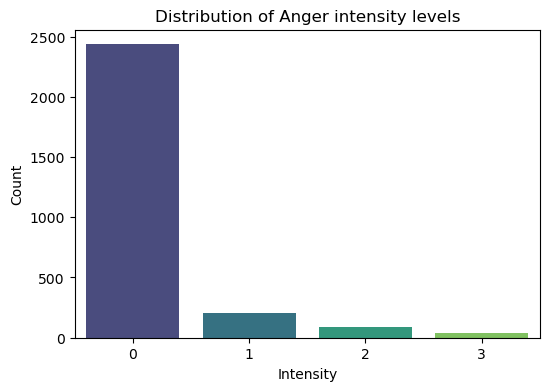

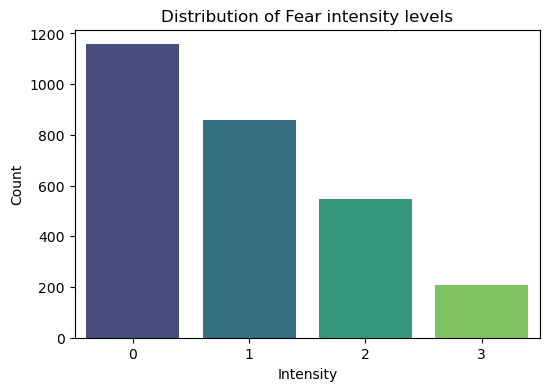

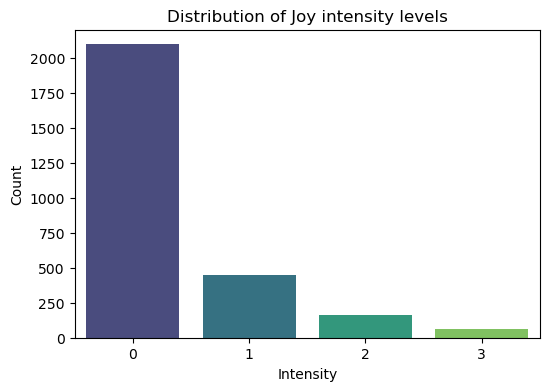

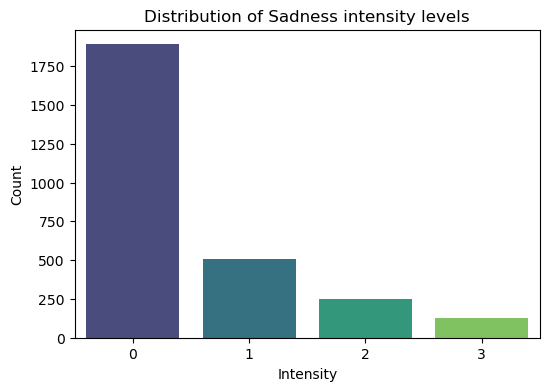

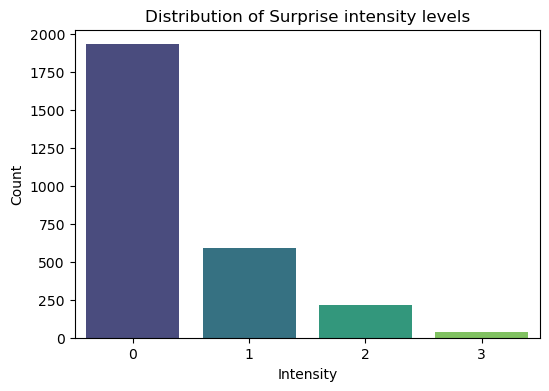

In [8]:
emotion_columns = ['anger','fear', 'joy','sadness', 'surprise']
for col in emotion_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col.capitalize()} intensity levels')
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.show()

#The different distribution level of each emotion corresponding to varying intensity shows how emotions manifest in our dataset.
#From the distribution we can infer that 'Anger' is the least expressed with almost 2500 texts with 0 intensity. And 'Fear' has the highest frequency with intensity 3.

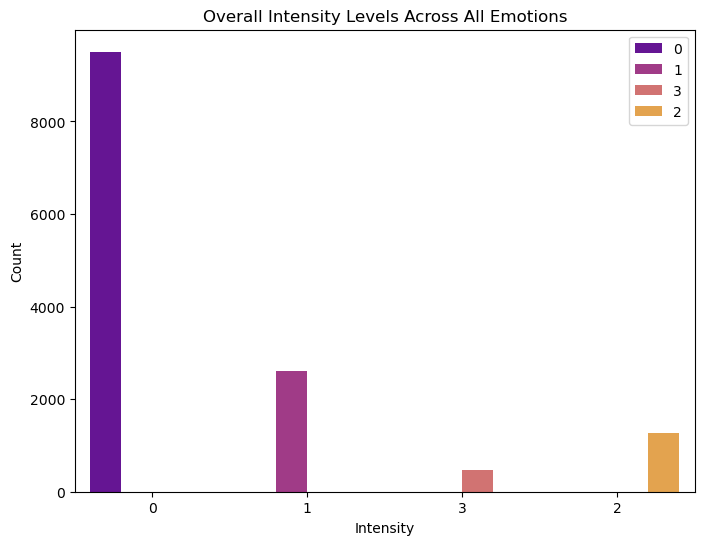

In [9]:
plt.figure(figsize=(8, 6))
all_intensities = pd.concat([df[col] for col in emotion_columns])
sns.countplot(x=all_intensities.astype(str), hue=all_intensities.astype(str), palette='plasma')
plt.title('Overall Intensity Levels Across All Emotions')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()

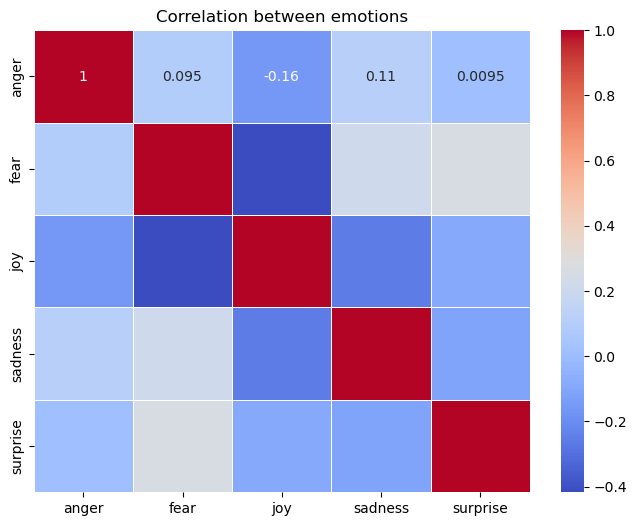

In [10]:
plt.figure(figsize=(8, 6))
corr = df[emotion_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between emotions')
plt.show()


#Emotions such as fear and surprise show a notably high positive correlation, suggesting that when one of these emotions is strongly expressed, the other is likely to be similarly intense. This aligns with their psychological proximity as both are considered negative, reactive states.
#Similarly, sadness and fear are also moderately positively correlated, reflecting how these emotions often co-occur in contexts involving loss, threat, or distress.
#Emotions like joy typically exhibit a weak or even negative correlation with negative emotions such as anger, sadness, and fear. This is expected, as joy represents a fundamentally different emotional dimension compared to the others.

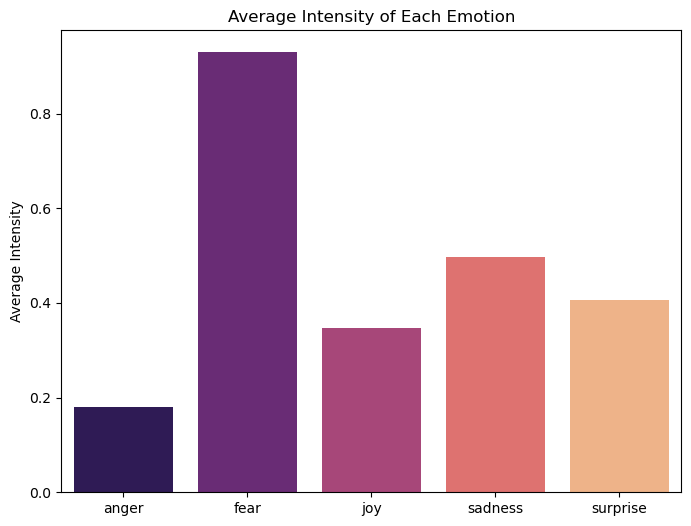

In [11]:
avg_intensity = df[emotion_columns].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_intensity.index, y=avg_intensity.values, palette='magma')
plt.title('Average Intensity of Each Emotion')
plt.ylabel('Average Intensity')
plt.show()

In [12]:
top_fear = df.sort_values(by='fear', ascending=False).head(5)
print("\nTop 5 texts with highest fear intensity:")
print(top_fear[['id', 'text', 'fear']])


Top 5 texts with highest fear intensity:
                           id  \
515   eng_train_track_b_00516   
2255  eng_train_track_b_02256   
1572  eng_train_track_b_01573   
1573  eng_train_track_b_01574   
668   eng_train_track_b_00669   

                                                   text  fear  
515   I sensed, and then saw four short (about 3 fee...     3  
2255  just the thought of having to get up and speak...     3  
1572  When I fell asleep in some strangers bedroom a...     3  
1573  Probably going to get buried, spooky as hell, ...     3  
668   My parents kept yelling while I walked into th...     3  


In [13]:
top_sadness = df.sort_values(by='sadness', ascending=False).head(5)
print("\nTop 5 texts with highest sadness intensity:")
print(top_sadness[['id', 'text', 'sadness']])


Top 5 texts with highest sadness intensity:
                           id  \
698   eng_train_track_b_00699   
2412  eng_train_track_b_02413   
1789  eng_train_track_b_01790   
1493  eng_train_track_b_01494   
2681  eng_train_track_b_02682   

                                                   text  sadness  
698                                I cried, every time.        3  
2412  Had to sit with her in the car as she was howl...        3  
1789  And this tradition keep on, every time billy m...        3  
1493  I nodded, pulling my arms across my chest, hop...        3  
2681              He begged the nurse not to leave him.        3  


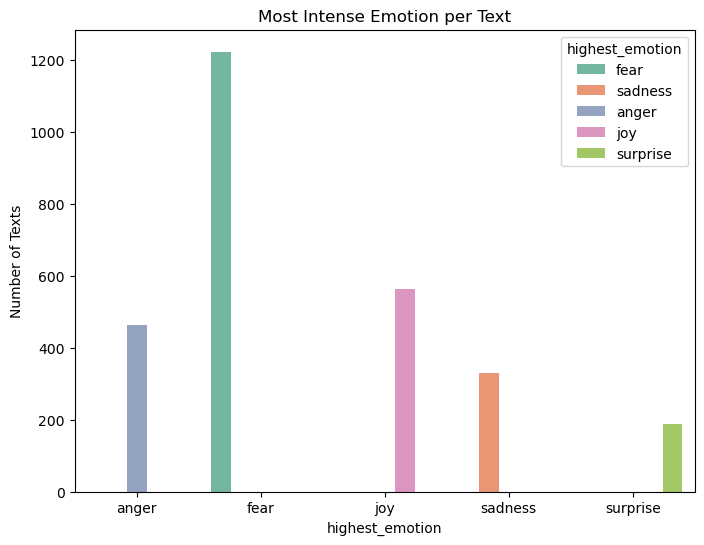

In [14]:
df['highest_emotion'] = df[emotion_columns].idxmax(axis=1)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='highest_emotion', order=emotion_columns, palette='Set2',hue='highest_emotion')
plt.title('Most Intense Emotion per Text')
plt.ylabel('Number of Texts')
plt.show()

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

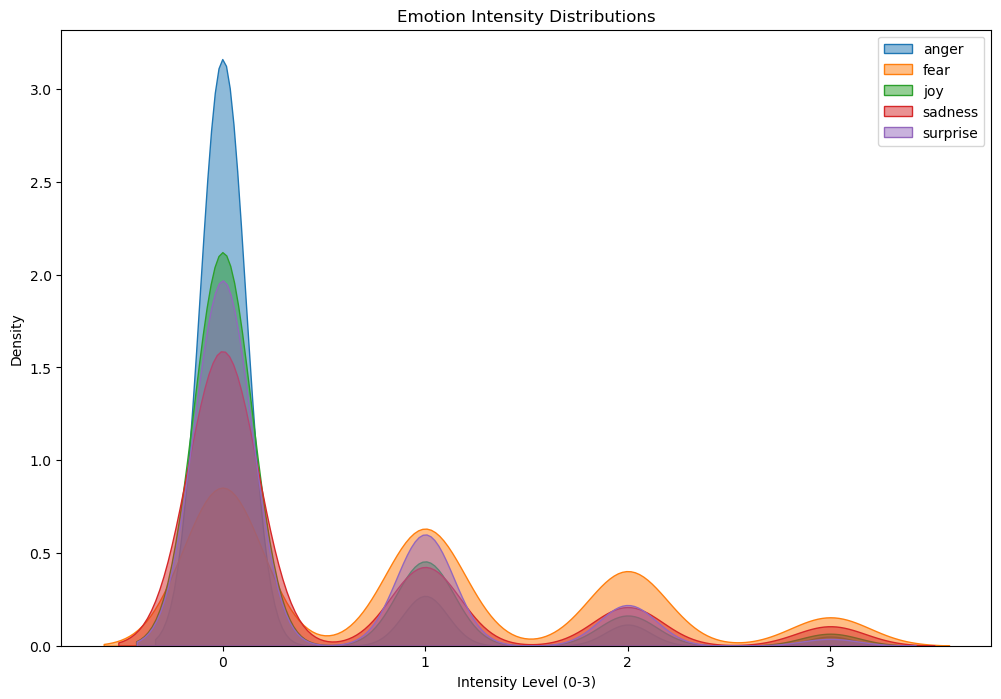

In [15]:
# Stacked histogram for all emotions
plt.figure(figsize=(12, 8))
for emotion in emotion_columns:
    sns.kdeplot(df[emotion], fill=True, alpha=0.5, label=emotion)
plt.title('Emotion Intensity Distributions')
plt.xlabel('Intensity Level (0-3)')
plt.legend()
plt.show()

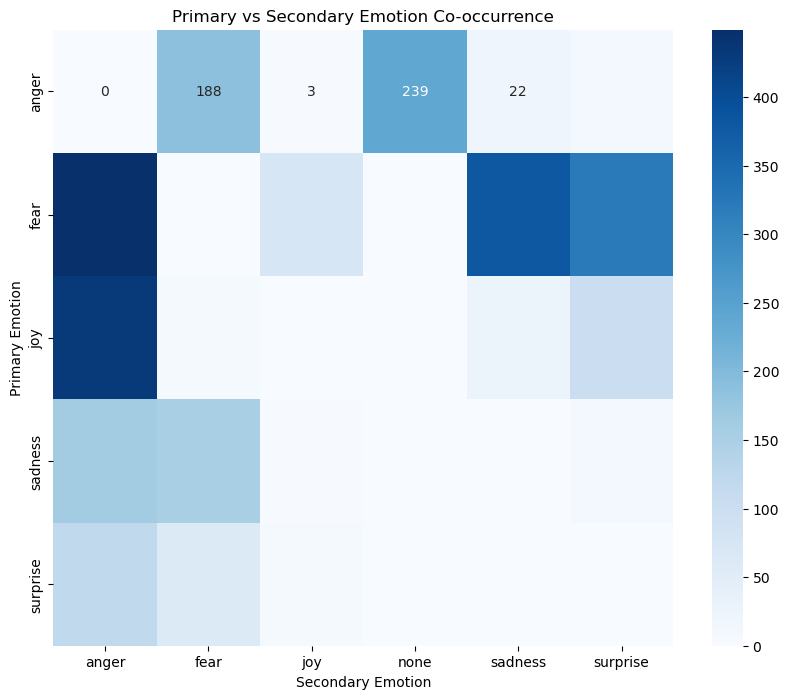

In [16]:
# Add secondary emotion column
df['secondary_emotion'] = df.apply(
    lambda row: row[emotion_columns].drop(row['highest_emotion']).idxmax() 
    if row[emotion_columns].max() > 0 else 'none',
    axis=1
)

# Plot primary vs secondary emotions
cross_tab = pd.crosstab(df['highest_emotion'], df['secondary_emotion'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Primary vs Secondary Emotion Co-occurrence')
plt.ylabel('Primary Emotion')
plt.xlabel('Secondary Emotion')
plt.show()

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


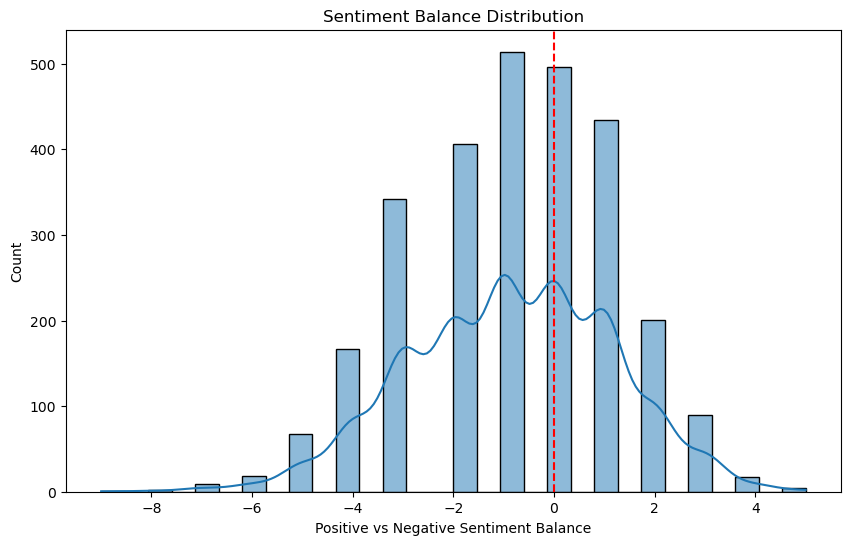

In [17]:
# Define sentiment groups
positive_emotions = ['joy', 'surprise']
negative_emotions = ['fear', 'sadness', 'anger']

# Calculate scores
df['positive_score'] = df[positive_emotions].sum(axis=1)
df['negative_score'] = df[negative_emotions].sum(axis=1)
df['sentiment_balance'] = df['positive_score'] - df['negative_score']

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_balance'], bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title('Sentiment Balance Distribution')
plt.xlabel('Positive vs Negative Sentiment Balance')
plt.show()

#Since the peak of the histogram is on the left side of zero,most texts have stronger negative emotion intensities than positive ones

In [18]:
def get_top_words(text_series, n=20):
    """Extract top words from a series of texts"""
    all_text = ' '.join(text_series).lower()
    words = word_tokenize(all_text)
    
    # Filter out stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Count word frequencies
    word_freq = Counter(words)
    return word_freq.most_common(n)

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


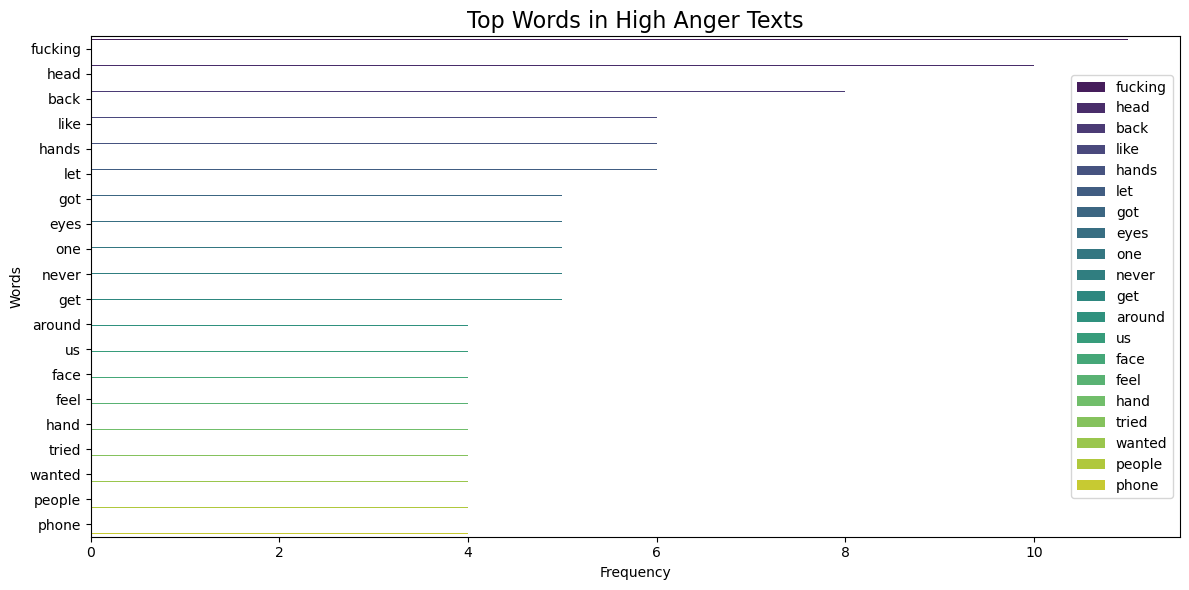

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


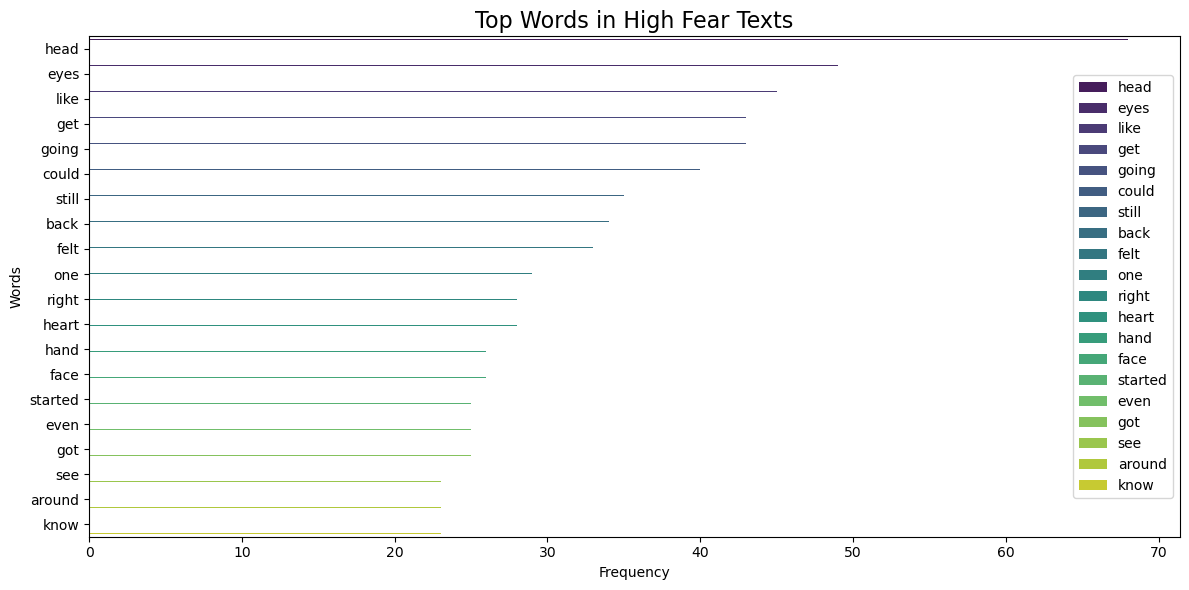

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


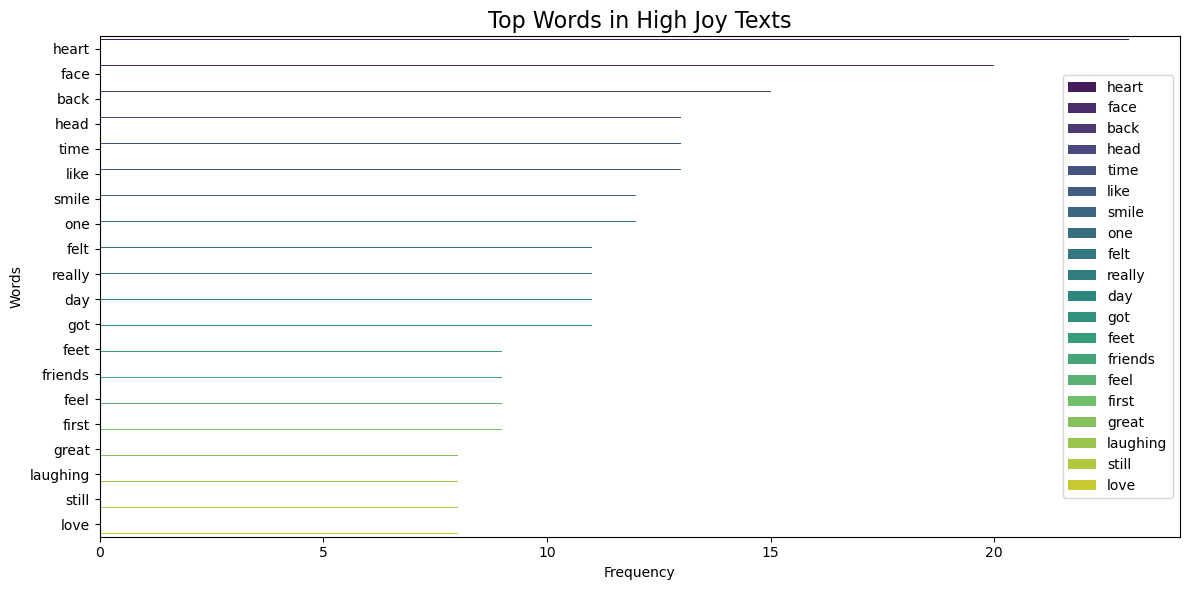

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


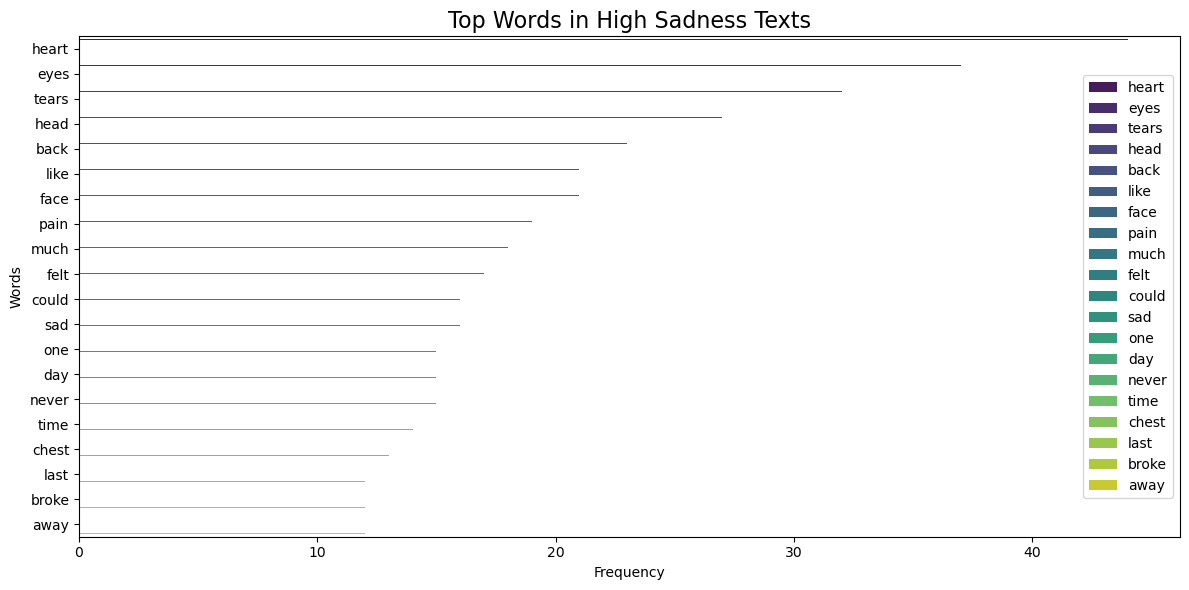

c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\avin5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


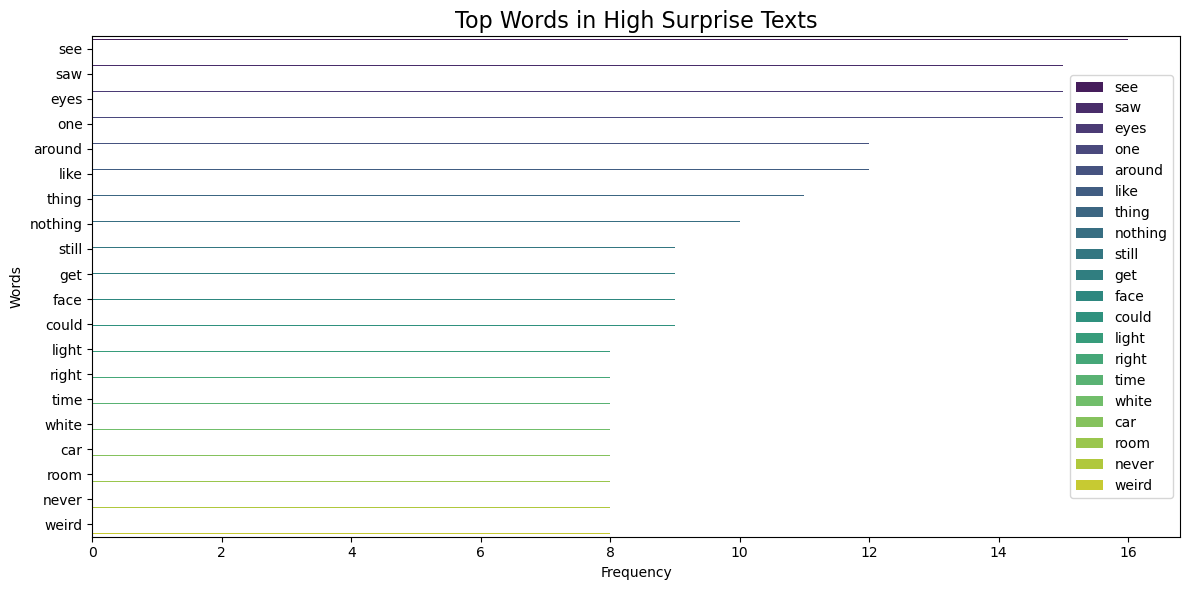

In [19]:
# Generate top words for each emotion
for emotion in emotion_columns:
    # Get texts with high intensity for this emotion (intensity >= 2)
    high_intensity_texts = df[df[emotion] >= 2]['text']
    
    if not high_intensity_texts.empty:
        top_words = get_top_words(high_intensity_texts)
        words, counts = zip(*top_words)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(words), palette='viridis', hue=list(words))
        plt.title(f'Top Words in High {emotion.capitalize()} Texts', fontsize=16)
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.tight_layout()
        plt.show()


In [29]:
data = pd.read_csv('track-b.csv')
data["text_length"] = data["text"].apply(len)
data["word_count"] = data["text"].apply(lambda x: len(word_tokenize(x)))
data

,id,text,anger,fear,joy,sadness,surprise,text_length,word_count
0,eng_train_track_b_00001,"Colorado, middle of nowhere.",0,1,0,0,1,28,6
1,eng_train_track_b_00002,This involved swimming a pretty large lake tha...,0,2,0,0,0,65,13
2,eng_train_track_b_00003,It was one of my most shameful experiences.,0,1,0,3,0,43,9
3,eng_train_track_b_00004,"After all, I had vegetables coming out my ears...",0,0,0,0,0,87,19
4,eng_train_track_b_00005,Then the screaming started.,0,3,0,1,2,27,5
...,...,...,...,...,...,...,...,...,...
2763,eng_train_track_b_02764,She cants her hip against my waist into my sid...,0,0,2,0,1,177,37
2764,eng_train_track_b_02765,"I then did the dishes, whitened my teeth, watc...",0,0,0,0,0,91,21
2765,eng_train_track_b_02766,It just kind of gradually vanished over a coup...,0,0,0,0,1,58,12
2766,eng_train_track_b_02767,I didn't look out of my hands.,0,1,0,0,0,30,9
